In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.stats import kurtosis, skew
from statsmodels.tsa.stattools import adfuller

import scipy.stats as st
from scipy.stats import shapiro
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('Homework_1_DATA.csv', sep = ";", decimal = ",")
series1 = data.iloc[:300,0]
series2 = data.iloc[:200,1]
series3 = data.iloc[:200,2]
series4 = data.iloc[:200,3]
series5 = data.iloc[:200,4]
series6 = data.iloc[:2000,5]

In [3]:
def plot_graphs(y, num_lags, acf_only=None):
    if not acf_only:
        plt.plot(y)
        plt.show()
    plot_acf(y,lags=num_lags)
    plt.show()
    plot_pacf(y,lags=num_lags,method="ols")
    plt.show()

In [4]:
def statistics(y): 
    # Basic statistics
    mean = np.mean(y)
    std = np.std(y)
    kur = kurtosis(y)
    skewness = skew(y)
    return {'mean': mean, 'std': std, 'kur': kur, 'skewness': skewness}

In [5]:
def adf(y):
    # Ho: the process is not stationary. We need, at least, a unit root
    # H1: the process is stationary. We have to check different models (lags)
    adf_test = adfuller(y,maxlag=10) 
    print("ADF test for the original series")
    print("Statistic Value:" , adf_test[0])
    print("p-value:" , adf_test[1])

In [6]:
import scipy.stats as st
import seaborn as sns
def hist(y, mean, std):
    mu = np.mean(y)
    sigma = np.std(y)
    x = np.linspace(mu -5*sigma, mu +5*sigma, 1000)
    pdf = st.norm.pdf(x, mu, sigma)
    ax = plt.plot(x, pdf, lw = 2, color = "g")
    ax = plt.hist(y,density=True, range = (mean - 3*std, mean + 3*std), color = "r")
    ax = sns.distplot(y, hist = False, kde = True,
                     kde_kws = {'linewidth': 2}, color = "blue")
    ax.set_xlim(mean - 5*std, mean + 5*std)
    
    plt.show()

In [7]:
from scipy.stats import shapiro
def shap(y):
    # Normality test
    saphiro = shapiro(y)
    
    print("Saphiro",saphiro)

In [8]:
import statsmodels.api as sm
def box_test(y, lags):
    #Correlation test
    result = sm.stats.acorr_ljungbox(y, lags=[lags])
    return result

# Series 2

In [9]:
y = series2

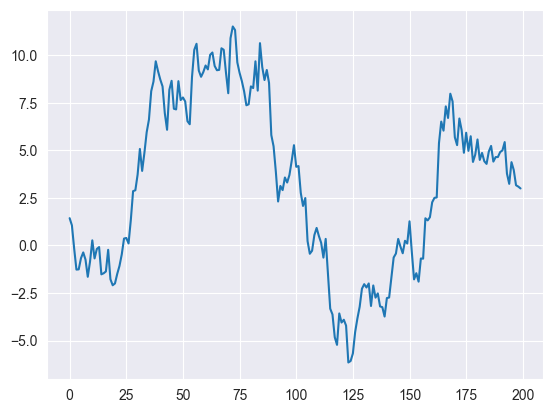

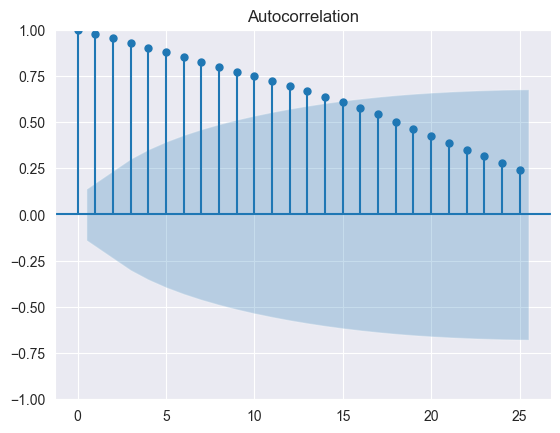

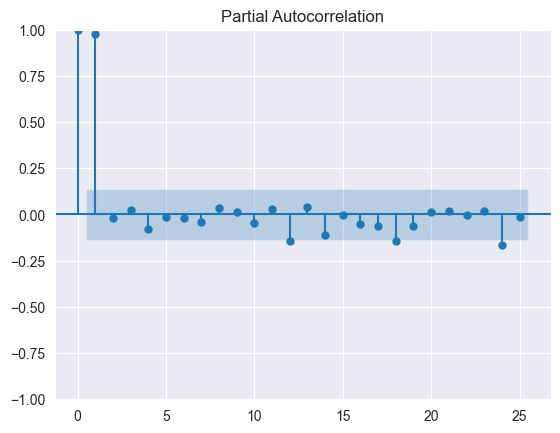

In [10]:
plot_graphs(y, 25)

In [11]:
stats = statistics(y)
stats

{'mean': 3.2140599999999995,
 'std': 4.49916068132713,
 'kur': -1.134502675202323,
 'skewness': -0.05781460469271991}

In [12]:
adf(y)

ADF test for the original series
Statistic Value: -1.5439878580060473
p-value: 0.5116499225650438


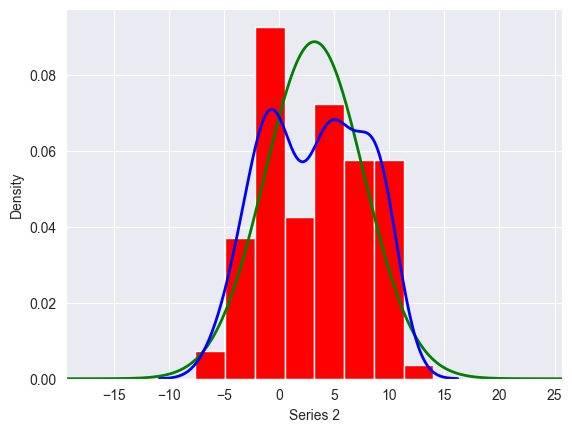

In [13]:
hist(y, mean=stats['mean'], std=stats['std'])

In [14]:
shap(y)

Saphiro ShapiroResult(statistic=0.961597204208374, pvalue=2.9560365874203853e-05)


In [15]:
box_test(y, 20)

,lb_stat,lb_pvalue
20,2317.007484,0.0


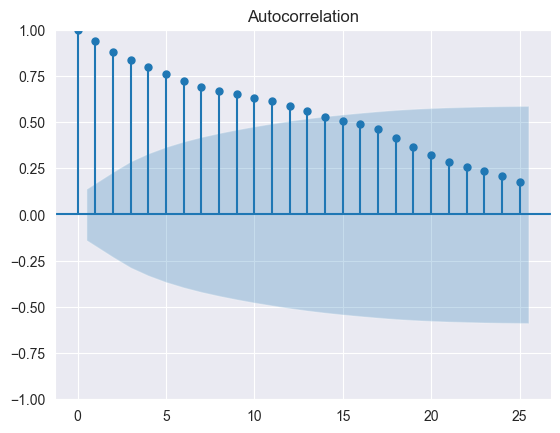

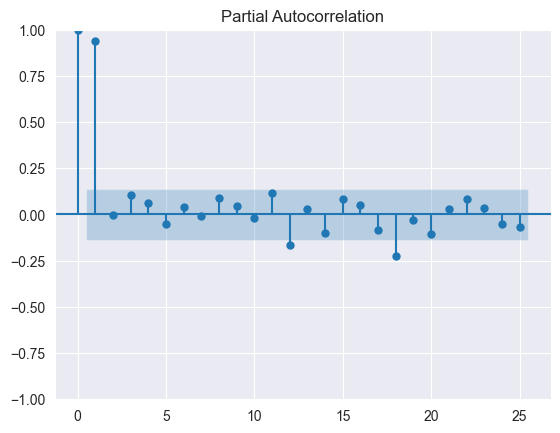

In [16]:
plot_graphs(y**2, 25, acf_only=True)

In [17]:
box_test(y**2, 20)

,lb_stat,lb_pvalue
20,1733.301229,0.0


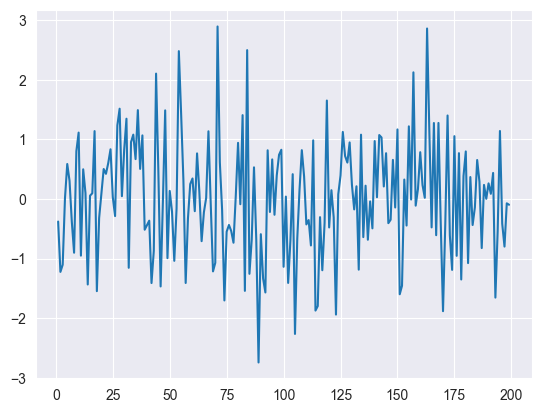

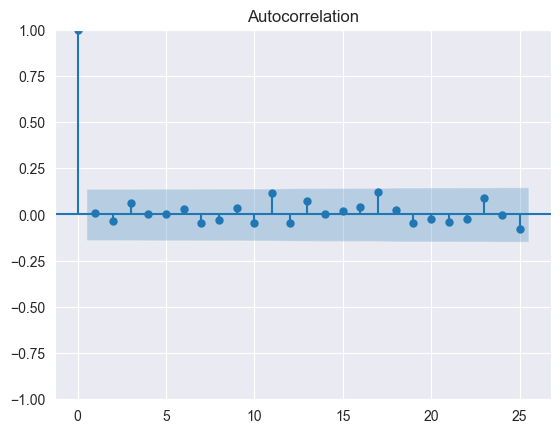

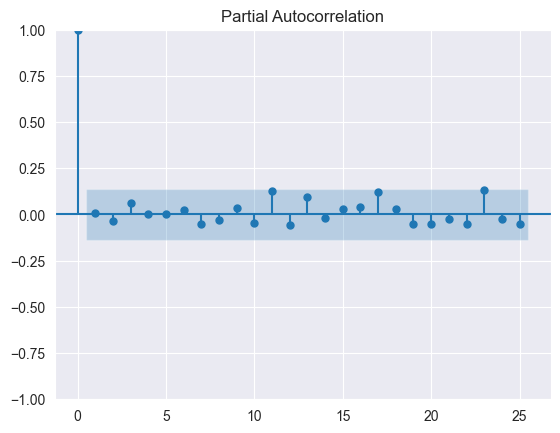

In [18]:
z = y.diff().dropna()
plot_graphs(z, 25)

In [19]:
stats = statistics(z)
stats

{'mean': 0.007854271356783914,
 'std': 0.9702008929768162,
 'kur': 0.20817001859312567,
 'skewness': 0.12469425590099656}

In [20]:
adf(z)

ADF test for the original series
Statistic Value: -13.911065424393001
p-value: 5.509350562781883e-26


In [21]:
print('Ljung-Box for z')
box_test(z,20)

Ljung-Box for z


,lb_stat,lb_pvalue
20,11.628867,0.928258


In [22]:
print("Ljung-Box for z**2")
box_test(z**2, 20)

Ljung-Box for z**2


,lb_stat,lb_pvalue
20,11.343952,0.93681


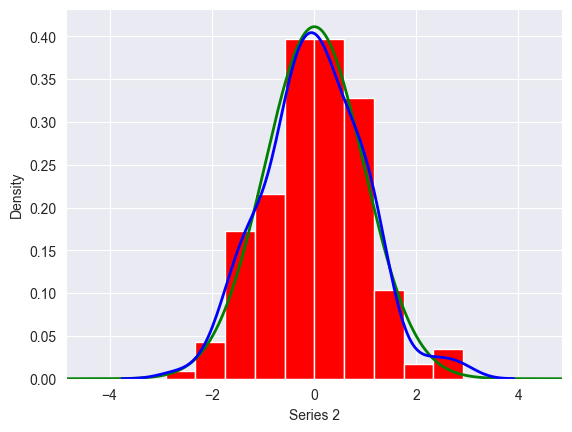

In [23]:
hist(z,mean=stats['mean'], std=stats['std'])

In [24]:
shap(z)

Saphiro ShapiroResult(statistic=0.9932922124862671, pvalue=0.5033549070358276)


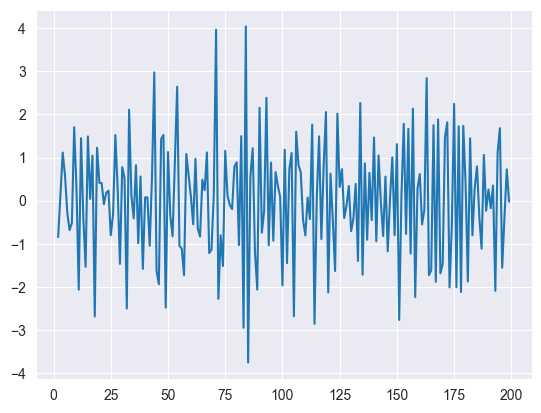

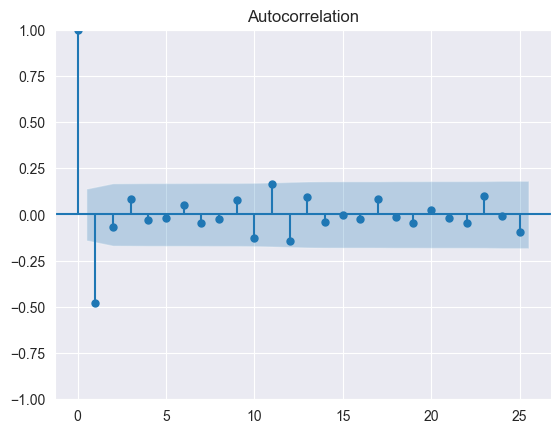

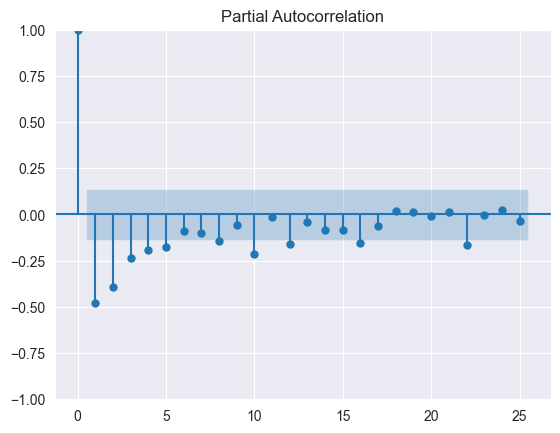

In [25]:
zz = y.diff(1).diff(1).dropna()
plot_graphs(zz, 25)

In [26]:
adf(zz)

ADF test for the original series
Statistic Value: -7.967042184869352
p-value: 2.846583163186952e-12


In [27]:
print('Ljung-Box for zz')
box_test(zz,20)

Ljung-Box for zz


,lb_stat,lb_pvalue
20,69.523409,2.178341e-07


In [28]:
print('Ljung-Box for zz**2')
box_test(zz**2,20)

Ljung-Box for zz**2


,lb_stat,lb_pvalue
20,33.642437,0.028648


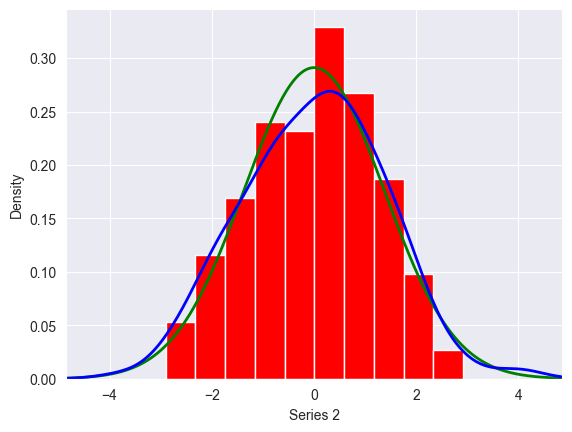

In [29]:
hist(zz,mean=stats['mean'], std=stats['std'])

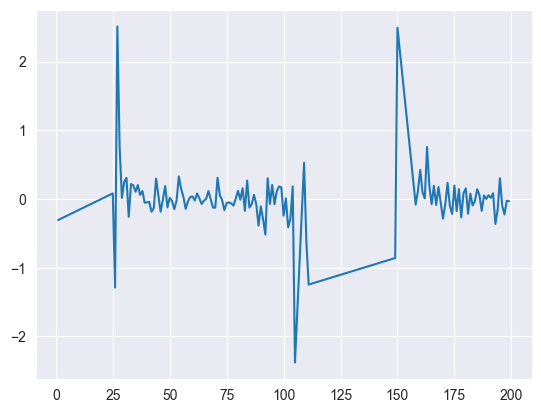

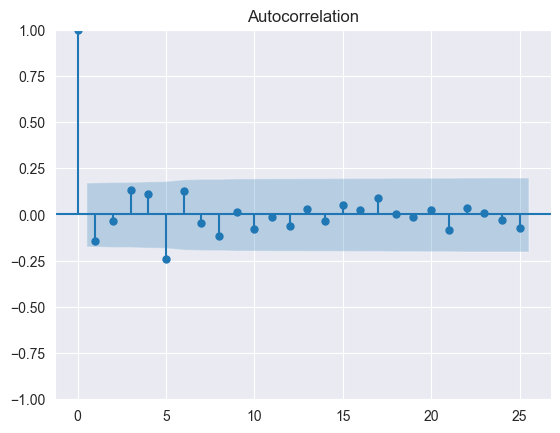

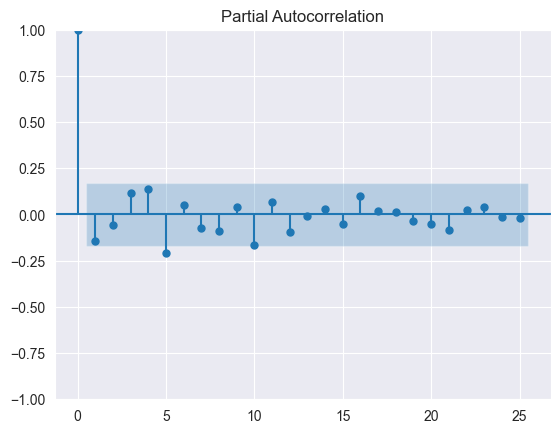

In [36]:
returns = np.log(y).diff().dropna() # we take log first and then one differente, diff(log(spot))
zz = returns
num_lags = 25
plot_graphs(zz, num_lags=num_lags)

In [37]:
adf(zz)

ADF test for the original series
Statistic Value: -5.674860365354496
p-value: 8.752023644729609e-07


In [38]:
print('Ljung-Box for zz')
box_test(zz,20)

Ljung-Box for zz


,lb_stat,lb_pvalue
20,22.479734,0.315056


In [33]:
print('Ljung-Box for zz**2')
box_test(zz**2,20)

Ljung-Box for zz**2


,lb_stat,lb_pvalue
20,17.47692,0.621823


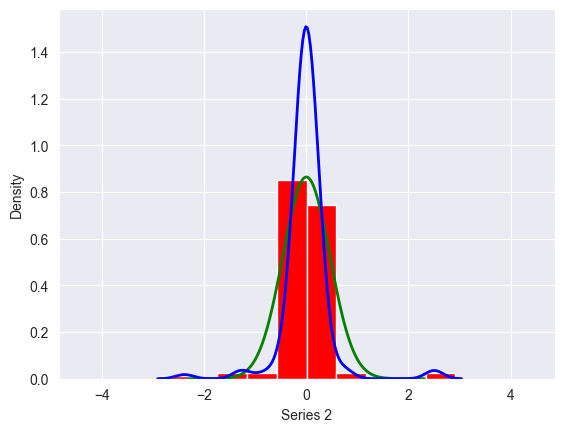

In [39]:
hist(zz,mean=stats['mean'], std=stats['std'])

In [35]:
shap(zz)

Saphiro ShapiroResult(statistic=0.6583389639854431, pvalue=6.566182466456391e-16)
